In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping


In [17]:
np.random.seed(123)
tf.random.set_seed(123)

def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2*T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0,
                                         size=len(x))
    return sin(x) + noise

In [18]:
T = 100
f = toy_problem(T).astype(np.float32)
length_of_sequences = len(f)
maxlen = 25

x = []
t = []

In [19]:
for i in range(length_of_sequences - maxlen):
    x.append(f[i:i+maxlen])
    t.append(f[i+maxlen])

x = np.array(x).reshape(-1, maxlen, 1)
t = np.array(t).reshape(-1, 1)

x_train, x_val, t_train, t_val = train_test_split(x, t, test_size=0.2, shuffle=False)


In [20]:
model = Sequential()
model.add(LSTM(50, activation='tanh', recurrent_activation='sigmoid', kernel_initializer='glorot_normal', recurrent_initializer='orthogonal'))
model.add(Dense(1, activation='linear'))

In [21]:
optimizer = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=True)

model.compile(optimizer=optimizer,loss='mean_squared_error')

es = EarlyStopping(monitor='val_loss',
                       patience=10,
                       verbose=1)

hist = model.fit(x_train, t_train,epochs=1000, batch_size=100,verbose=2,validation_data=(x_val, t_val),callbacks=[es])

Epoch 1/1000
2/2 - 4s - loss: 0.3597 - val_loss: 0.3863
Epoch 2/1000
2/2 - 0s - loss: 0.3042 - val_loss: 0.3231
Epoch 3/1000
2/2 - 0s - loss: 0.2541 - val_loss: 0.2657
Epoch 4/1000
2/2 - 0s - loss: 0.2077 - val_loss: 0.2122
Epoch 5/1000
2/2 - 0s - loss: 0.1698 - val_loss: 0.1646
Epoch 6/1000
2/2 - 0s - loss: 0.1393 - val_loss: 0.1225
Epoch 7/1000
2/2 - 0s - loss: 0.1206 - val_loss: 0.0904
Epoch 8/1000
2/2 - 0s - loss: 0.1114 - val_loss: 0.0701
Epoch 9/1000
2/2 - 0s - loss: 0.1023 - val_loss: 0.0593
Epoch 10/1000
2/2 - 0s - loss: 0.0894 - val_loss: 0.0527
Epoch 11/1000
2/2 - 0s - loss: 0.0765 - val_loss: 0.0469
Epoch 12/1000
2/2 - 0s - loss: 0.0666 - val_loss: 0.0409
Epoch 13/1000
2/2 - 0s - loss: 0.0586 - val_loss: 0.0353
Epoch 14/1000
2/2 - 0s - loss: 0.0522 - val_loss: 0.0303
Epoch 15/1000
2/2 - 0s - loss: 0.0463 - val_loss: 0.0258
Epoch 16/1000
2/2 - 0s - loss: 0.0407 - val_loss: 0.0220
Epoch 17/1000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0187
Epoch 18/1000
2/2 - 0s - loss: 0.0272 - 

In [22]:
sin = toy_problem(T, ampl=0.)
gen = [None for i in range(maxlen)]

z = x[:1]

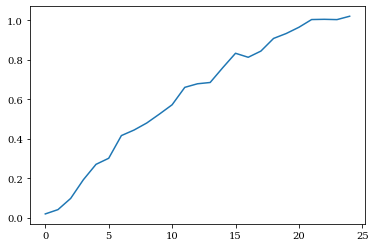

In [23]:
plt.plot(np.array(z).reshape(-1, 1))

In [24]:
for i in range(length_of_sequences - maxlen):
    preds = model.predict(z[-1:])
    z = np.append(z, preds)[1:]
    z = z.reshape(-1, maxlen, 1)
    gen.append(preds[0, 0])

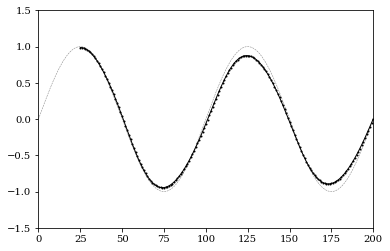

In [14]:
fig = plt.figure()
plt.rc('font', family='serif')
plt.xlim([0, 2*T])
plt.ylim([-1.5, 1.5])
plt.plot(range(len(f)), sin,
             color='gray',
             linestyle='--', linewidth=0.5)
plt.plot(range(len(f)), gen,
             color='black', linewidth=1,
             marker='o', markersize=1, markerfacecolor='black',
             markeredgecolor='black')
    # plt.savefig('output.jpg')
plt.show()

In [28]:
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2*T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0,
                                         size=len(x))
    return sin(x) + noise

In [29]:
sin = toy_problem(T, ampl=0.)
gen = [None for i in range(maxlen)]

z = x[:1]

In [30]:
for i in range(length_of_sequences - maxlen):
        preds = model.predict(z[-1:])
        z = np.append(z, preds)[1:]
        z = z.reshape(-1, maxlen, 1)
        gen.append(preds[0, 0])